## Import necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

## Load the dataset

In [2]:
df = pd.read_csv("Customer_Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5905,1628-BIZYP,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85,No
6766,9845-QOMAD,Male,0,Yes,Yes,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.75,309.35,No
571,7025-WCBNE,Male,1,No,No,47,Yes,Yes,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),59.60,2754,No
1878,0463-WZZKO,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.75,67.1,No
6325,4558-FANTW,Female,0,Yes,Yes,17,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,91.85,1574.45,Yes


In [3]:
df.shape

(7043, 21)

**Drop customerID column as it's not useful for model training**

In [4]:
df.drop('customerID', axis='columns', inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Convert TotalCharges to numeric and handle any non-numeric values**

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df[df['TotalCharges'].notnull()]

In [7]:
print(df.dtypes)
print('\n',df.shape)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

 (7032, 20)


## Data Visualization

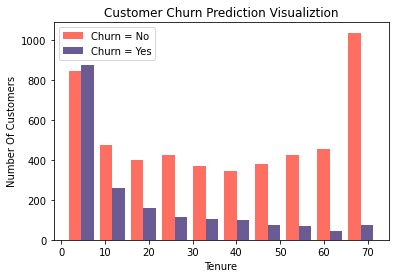

In [8]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_no, tenure_churn_yes],rwidth=0.8, color=['#ff6f61', '#6b5b95'], label=['Churn = No', 'Churn = Yes'])
plt.legend()
plt.show()

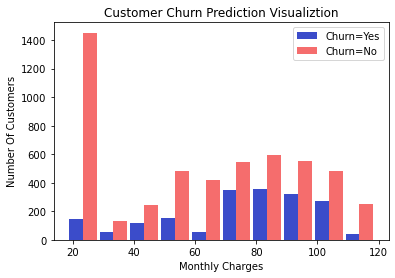

In [9]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.9, color=['#3b4cca', '#f56d6d'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

In [10]:
# Print unique values for object columns to examine categorical data
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [11]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Replace 'No internet service' and 'No phone service' with 'No'**

In [12]:
df.replace(['No internet service', 'No phone service'], 'No', inplace=True)

In [13]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert categorical columns with 'Yes'/'No' values to 1/0**

In [14]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


In [15]:
# Convert gender to binary
df['gender'] = df['gender'].replace({'Female': 1, 'Male': 0})

**One hot encoding for remaining categorical variables**

In [16]:
df2 = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5957,0,1,1,0,18,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6413,1,0,1,1,32,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
943,1,0,1,0,72,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
6731,1,0,0,0,24,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4841,1,0,0,0,24,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [18]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

**Normalize continuous features**

In [19]:
scaler = MinMaxScaler()
scaled_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df2[scaled_features] = scaler.fit_transform(df2[scaled_features])

In [20]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Split data into features (X) and target (y)**

In [21]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [23]:
X_train.shape

(5625, 26)

In [24]:
X_test.shape

(1407, 26)

In [25]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


## Build and compile the ANN model 

In [26]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5011 - accuracy: 0.7520
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7972
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8050
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8057
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8082
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8105
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4038 - accura

In [27]:
# Evaluate the model
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7612


[0.4861186742782593, 0.7611940503120422]

In [28]:
# Predict and evaluate predictions
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 1ms/step


In [29]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [30]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

## Classification report and confusion matrix

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       999
           1       0.60      0.52      0.56       408

    accuracy                           0.76      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.75      0.76      0.76      1407



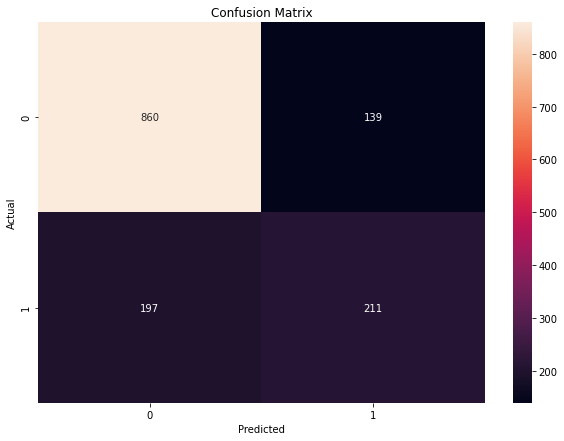

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Calculate and print accuracy, precision, recall
accuracy = round((cm[0, 0] + cm[1, 1]) / np.sum(cm), 2)
precision_0 = round(cm[0, 0] / (cm[0, 0] + cm[1, 0]), 2)
precision_1 = round(cm[1, 1] / (cm[1, 1] + cm[0, 1]), 2)
recall_0 = round(cm[0, 0] / (cm[0, 0] + cm[0, 1]), 2)
recall_1 = round(cm[1, 1] / (cm[1, 1] + cm[1, 0]), 2)

print(f'Accuracy: {accuracy}')
print(f'Precision (No churn): {precision_0}')
print(f'Precision (Churn): {precision_1}')
print(f'Recall (No churn): {recall_0}')
print(f'Recall (Churn): {recall_1}')


Accuracy: 0.76
Precision (No churn): 0.81
Precision (Churn): 0.6
Recall (No churn): 0.86
Recall (Churn): 0.52


### Metrics for visualization

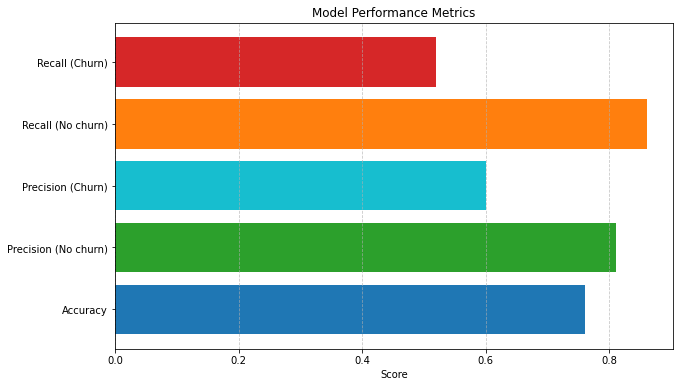

In [34]:
metrics = {
    'Accuracy': accuracy,
    'Precision (No churn)': precision_0,
    'Precision (Churn)': precision_1,
    'Recall (No churn)': recall_0,
    'Recall (Churn)': recall_1
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(list(metrics.keys()), metrics.values(), color = ['#1f77b4', '#2ca02c', '#17becf', '#ff7f0e', '#d62728']
)
plt.xlabel('Score')
plt.title('Model Performance Metrics')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
